## Import tools

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D,BatchNormalization
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Setting constant 

In [2]:
batch_size= 32
num_classes= 10

## Import data and train and test dataset

In [3]:
# The data, shuffled and split between train and test sets:
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

In [4]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [8]:
# convert class vectors to binary class matrices
y_train= keras.utils.to_categorical(y_train,num_classes)
y_test= keras.utils.to_categorical(y_test,num_classes)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## Showing images

In [10]:
import numpy as np
import matplotlib.pyplot as plt

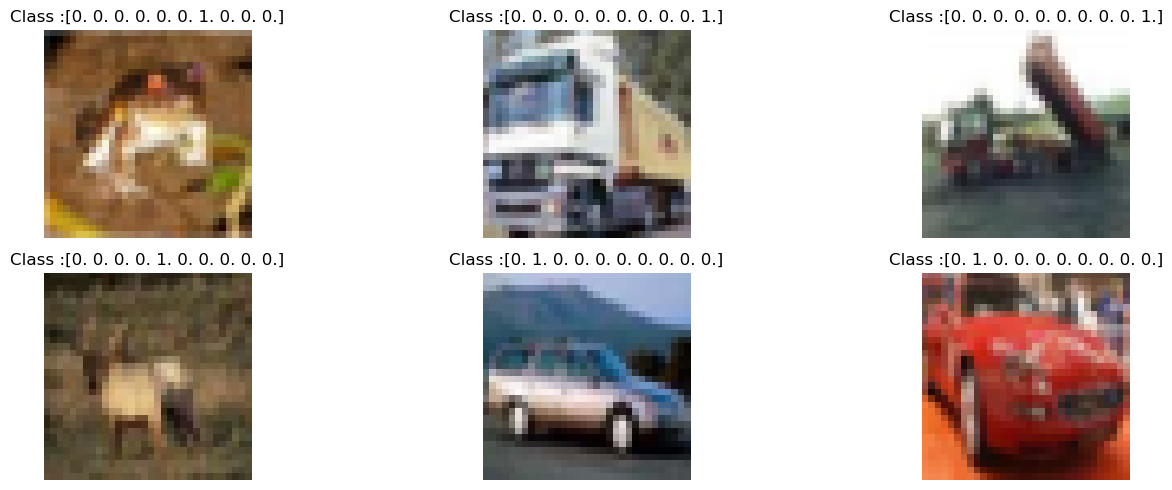

In [11]:
fig, axes= plt.subplots(2,3,figsize=(15,5))
axes=axes.flatten()
for i in range(2*3):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')
    axes[i].set_title(f"Class :{y_train[i]}")
plt.tight_layout()
plt.show()

## Feature scaling

In [12]:
x_train.dtype

dtype('uint8')

In [13]:
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

In [14]:
x_train.dtype

dtype('float32')

In [15]:
x_train= x_train/255
x_test= x_test/255

In [16]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

## Model architecture

In [17]:
model= Sequential()
# layer 1
# Convolutional layer with 32 filters, each of size 3x3
model.add(Conv2D(32, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
# ReLU activation function
model.add(Activation('relu'))
# Batch normalization layer
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(48, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(48, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(48, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Global max pooling layer
model.add(GlobalMaxPooling2D())
# Dropout layer with dropout rate of 0.25
model.add(Dropout(0.25))

# Fully connected layer with number of units equal to the number of classes
model.add(Dense(num_classes))
# Softmax activation function for multi-class classification
model.add(Activation('softmax'))


# Print the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                     

## Model Compilation & Training

In [18]:
opt = keras.optimizers.Adamax(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [19]:
history =model.fit(x_train, y_train,
              batch_size=500,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10



100/100 [==============================] - 157s 2s/step - loss: 2.8952 - accuracy: 0.2304 - val_loss: 2.3470 - val_accuracy: 0.1007
Epoch 2/10
100/100 [==============================] - 147s 1s/step - loss: 2.1674 - accuracy: 0.2927 - val_loss: 2.4549 - val_accuracy: 0.1000
Epoch 3/10
100/100 [==============================] - 147s 1s/step - loss: 1.9818 - accuracy: 0.3325 - val_loss: 2.7792 - val_accuracy: 0.1001
Epoch 4/10
100/100 [==============================] - 150s 2s/step - loss: 1.8567 - accuracy: 0.3675 - val_loss: 2.8170 - val_accuracy: 0.1105
Epoch 5/10
100/100 [==============================] - 147s 1s/step - loss: 1.7598 - accuracy: 0.3953 - val_loss: 2.5041 - val_accuracy: 0.1604
Epoch 6/10
100/100 [==============================] - 146s 1s/step - loss: 1.6714 - accuracy: 0.4199 - val_loss: 1.7533 - val_accuracy: 0.3611
Epoch 7/10
100/100 [==============================] - 148s 1s/step - loss: 1.5765 - accuracy: 0.4572 - val_loss: 1.3964 - val_accuracy: 0.4870
Epoch 8/10

## Save the model

In [20]:
model.save("cifar10_model.h5")

C:\Users\nikhi\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Training and Validation Loss

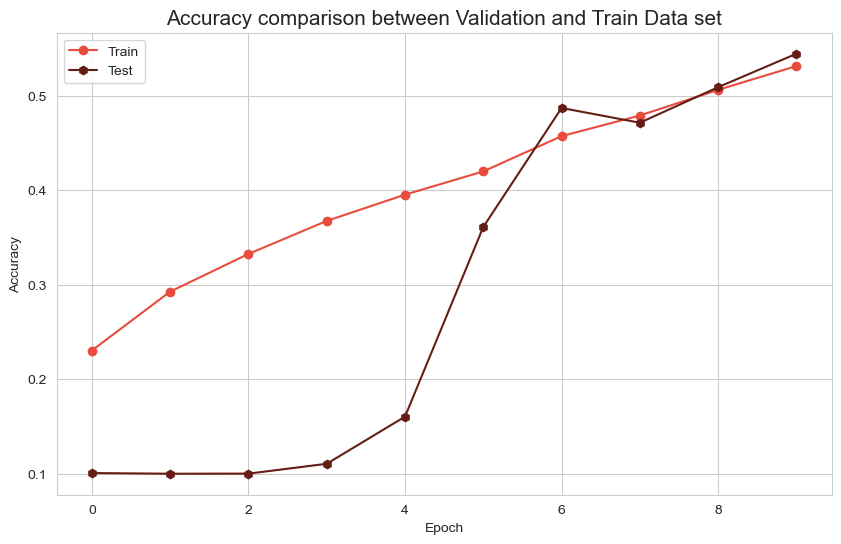

In [21]:
import seaborn as sb
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(history.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(history.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

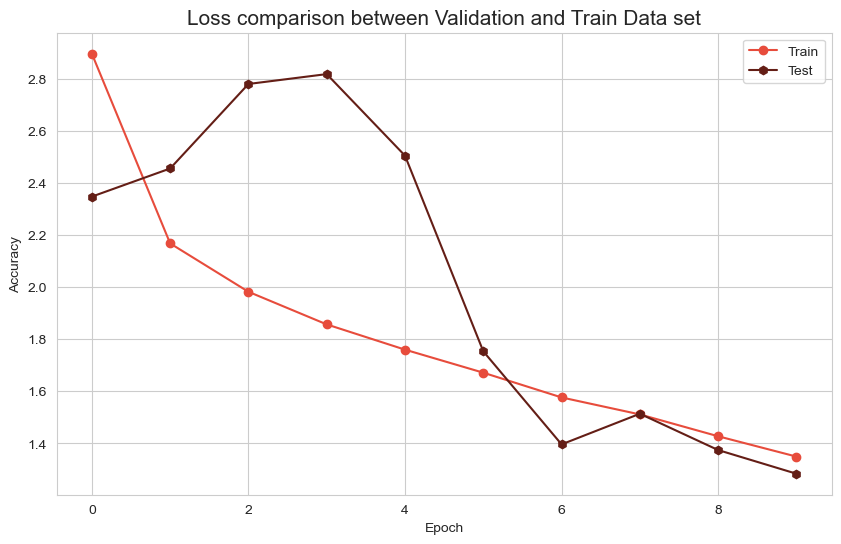

In [22]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(history.history['loss'],color="#E74C3C",marker='o')
plt.plot(history.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

313/313 [==============================] - 12s 34ms/step


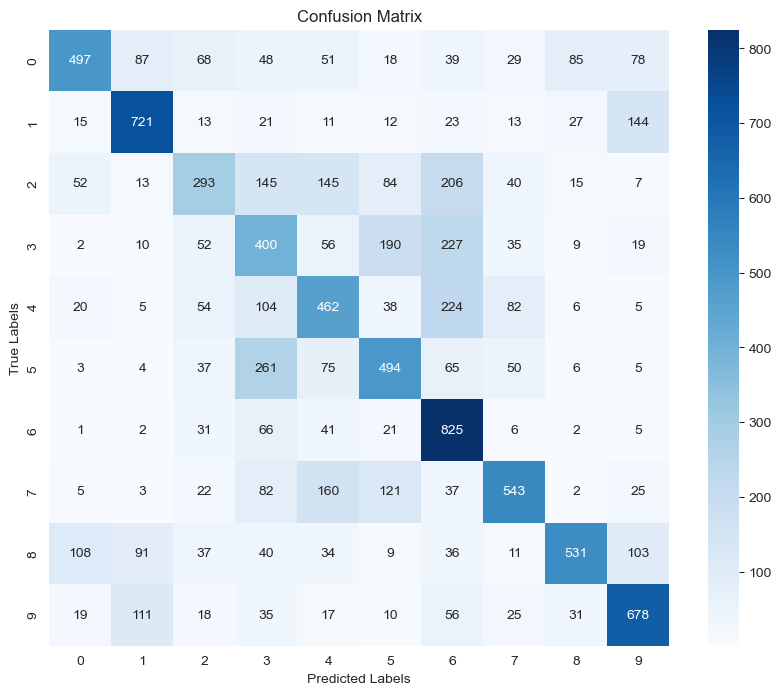

In [23]:
#predictions on the test data and store them in y_pred
y_pred = model.predict(x_test)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Classification report

In [25]:
# Generate the classification report
from sklearn.metrics import classification_report

class_report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.50      0.58      1000
           1       0.69      0.72      0.70      1000
           2       0.47      0.29      0.36      1000
           3       0.33      0.40      0.36      1000
           4       0.44      0.46      0.45      1000
           5       0.50      0.49      0.49      1000
           6       0.47      0.82      0.60      1000
           7       0.65      0.54      0.59      1000
           8       0.74      0.53      0.62      1000
           9       0.63      0.68      0.66      1000

    accuracy                           0.54     10000
   macro avg       0.56      0.54      0.54     10000
weighted avg       0.56      0.54      0.54     10000



## Predictive System

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random

def predict():
    # Randomly select an index from the test set
    idx = random.randint(0, len(x_test) - 1)

    # Select the image and its corresponding label
    image = x_test[idx]
    actual_label = y_test[idx]

    # Make predictions using the trained model
    predictions = model.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(predictions)

    # Define class names (assuming num_classes is defined)
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']


    # Display the image
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Actual: {class_names[np.argmax(actual_label)]}, Predicted: {class_names[predicted_label]}')
    plt.show()

1/1 [==============================] - 0s 75ms/step


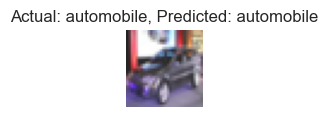

In [29]:
predict()

1/1 [==============================] - 0s 69ms/step


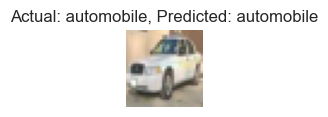

In [30]:
predict()

1/1 [==============================] - 0s 51ms/step


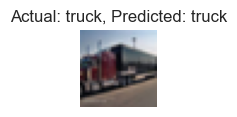

In [31]:
predict()
